# **Linear Regression with Student Performance Dataset**

## Get our Data

We will use the [Student Performance Data Set from UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)! Download this data our just use the supplied csv files in the notebook repository. We'll specifically look at the math class (student-mat.csv). Make sure to take note that the delimiter is a semi-colon.



In [ ]:
# Read CSV, note the delimiter (sep)
df <- read.csv('student-mat.csv',sep=';')

In [ ]:
head(df)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [ ]:
summary(df)


    school              sex                 age         address         
 Length:395         Length:395         Min.   :15.0   Length:395        
 Class :character   Class :character   1st Qu.:16.0   Class :character  
 Mode  :character   Mode  :character   Median :17.0   Mode  :character  
                                       Mean   :16.7                     
                                       3rd Qu.:18.0                     
                                       Max.   :22.0                     
   famsize            Pstatus               Medu            Fedu      
 Length:395         Length:395         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :2.749   Mean   :2.522  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   Max.   :

## Attribute Information

Here is the attribute information for our data set: Attribute Information:

**Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:**

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - more than 1 hour)
* 14 studytime - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
* 15 failures - number of past class failures (numeric: n if between 1 and 3 , else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)
these grades are related with the course subject, Math or Portuguese:

* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)

## Clean the Data

Next we have to clean this data. This data is actually already cleaned for you, But here are some things you may want to consider doing for other data sets:

### Check for NA values

Let's see if we have any NA values:


In [ ]:
any(is.na(df))

[1] FALSE

Great! Most real data sets will probably have NA or Null values, so its always good to check! Its up to you how to deal with them, either dropping them if they aren't too many, or imputing other values, like the mean value.

### Categorical Features

Moving on, let's make sure that categorical variables have a factor set to them. For example, the MJob column refers to categories of Job Types, not some numeric value from 1 to 5. R is actually really good at detecting these sort of values and will take of this work for you a lot of the time, but always keep in mind the use of factor() as a possible. Luckily this is basically already, we can check this using the str() function:

In [ ]:
str(df)


'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

## Exploratory Data Analysis

Let's use ggplot2 to explore the data a bit. Feel free to expand on this section:

In [ ]:
install.packages('ggthemes')
library(ggplot2)
library(ggthemes)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Correlation and CorrPlots

From Wikipedia, correlation is defined as:

* In statistics, dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. Familiar examples of dependent phenomena include the correlation between the physical statures of parents and their offspring, and the correlation between the demand for a product and its price.

Correlation plots are a great way of exploring data and seeing if there are any interaction terms. Let's start off by just grabbing the numeric data (we can't see correlation for categorical data):

In [ ]:
# Grab only numeric columns
num.cols <- sapply(df, is.numeric)

# Filter to numeric columns for correlation
cor.data <- cor(df[,num.cols])

cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


While this is fantastic information, it's hard to take it all in. Let's visualize all this data. There are lots of amazing 3rd party packages to do this, let's use and install the 'corrgram' package and the corrplot package. This will also install a bunch of dependencies for the package.

In [ ]:
install.packages('corrgram',repos = 'http://cran.us.r-project.org')
install.packages('corrplot',repos = 'http://cran.us.r-project.org')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(corrgram)

corrplot 0.95 loaded



Let's start by using corrplot

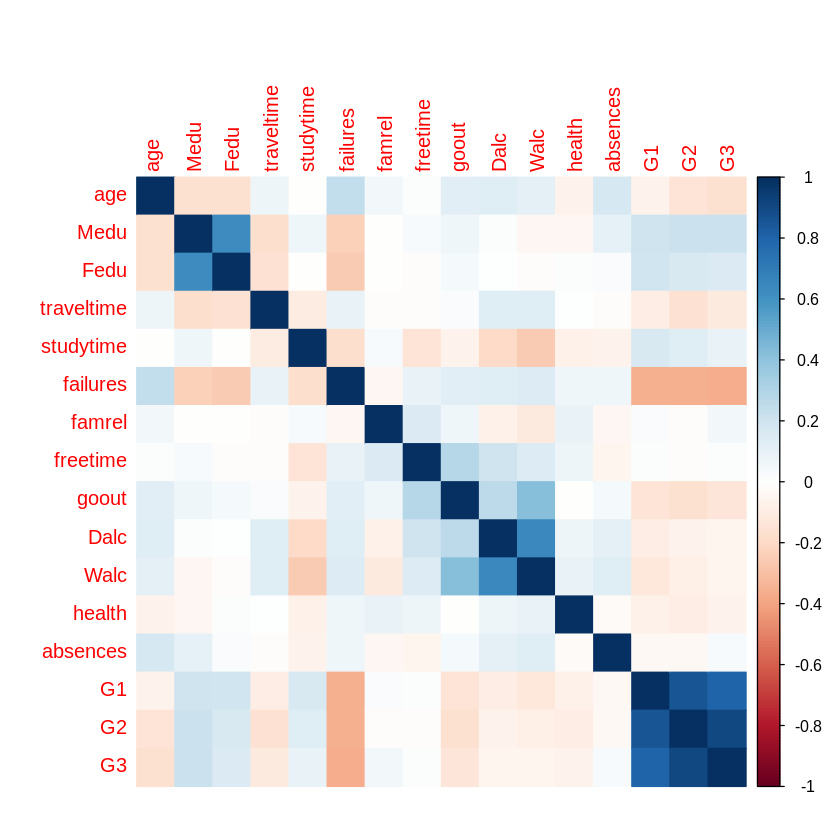

In [ ]:
corrplot(cor.data,method='color')


Cleary we have very high correlation between G1, G2, and G3 which makes sense since those are grades:

* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)

Meaning good students do well each period, and poor students do poorly each period, etc. Also a high G1,G2, or G3 value has a negative correlation with failure (number of past class failures).

Also Mother and Father education levels are correlated, which also makes sense.

We can also use the corrgram which allows to just automatically do these type of figures by just passing in the dataframe directly.

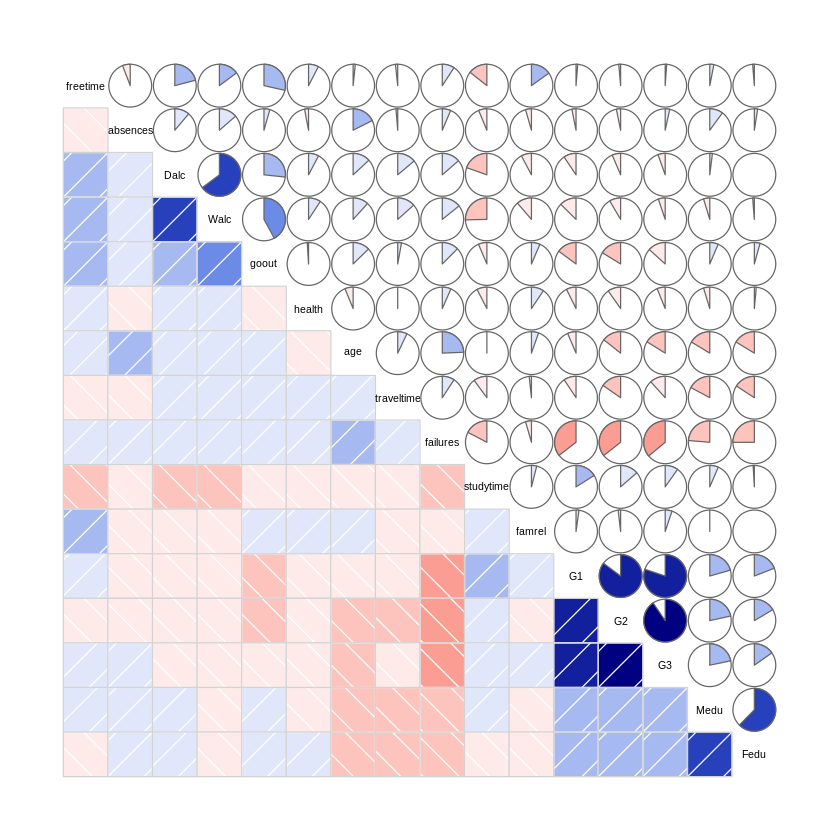

In [ ]:
corrgram(df,order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt)

Since we're going to eventually try to predict the G3 score let's see a histogram of these scores:

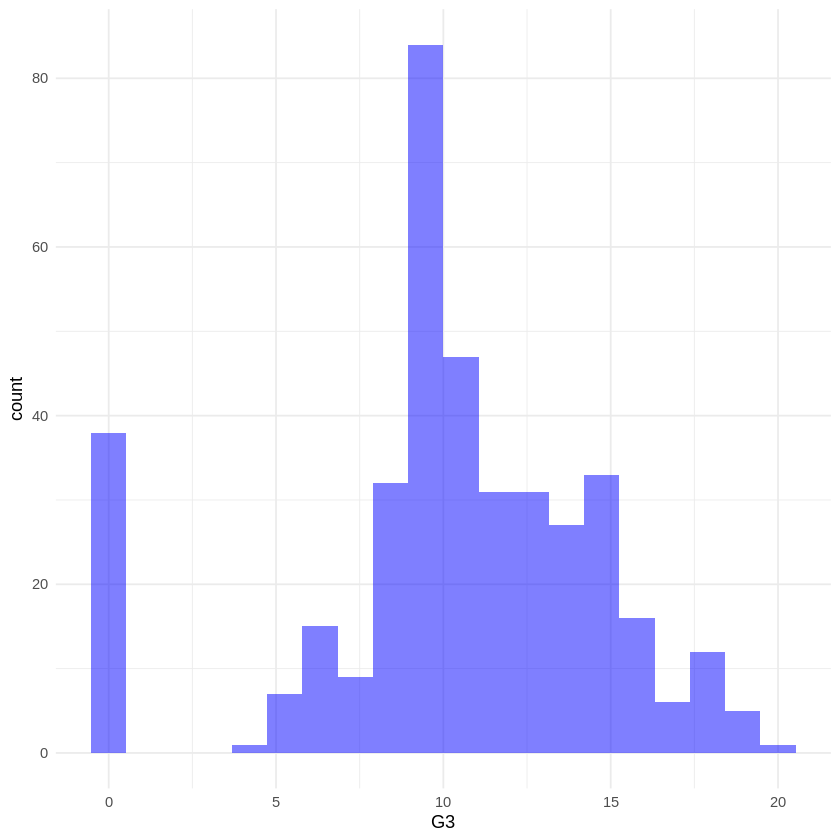

In [ ]:
ggplot(df,aes(x=G3)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()


Looks like quite a few students get a zero. This is a good place to ask questions, like are students missing the test? Also why is the mean occurence so high? Is this test curved?

Let's continue by building a model

# Building a Model

## General Form:

The general model of building a linear regression model in R looks like this:

model <- lm(y ~ x1 + x2,data)

or to use all the features in your data

model <- lm(y ~. , data) # Uses all features

## Train and Test Data

We'll need to split our data into a training set and a testing set in order to test our accuracy. We can do this easily using the caTools library:

In [ ]:
install.packages('caTools')
# Import Library
library(caTools)
# Set a random see so your "random" results are the same as this notebook
set.seed(101)

# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(df$age, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




# Training our Model

Let's train out model on our training data, then ask for a summary of that model:

In [ ]:
model <- lm(G3 ~ .,train)

In [ ]:
summary(model)



Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7681 -0.6423  0.2294  1.0691  4.5942 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.329568   2.474569  -0.537 0.591574    
schoolMS          0.838581   0.470545   1.782 0.076016 .  
sexM              0.034883   0.275586   0.127 0.899382    
age              -0.214994   0.119579  -1.798 0.073472 .  
addressU          0.067190   0.326035   0.206 0.836905    
famsizeLE3       -0.111068   0.283228  -0.392 0.695302    
PstatusT         -0.153653   0.401679  -0.383 0.702417    
Medu              0.279949   0.171111   1.636 0.103164    
Fedu             -0.221275   0.151103  -1.464 0.144422    
Mjobhealth        0.002065   0.610532   0.003 0.997304    
Mjobother         0.509947   0.403195   1.265 0.207209    
Mjobservices      0.475476   0.435332   1.092 0.275857    
Mjobteacher       0.285345   0.550640   0.518 0.604802    
Fjobhealth        0.433

Looks like Absences, G1, and G2 scores are good predictors. With age and activities also possibly contributing to a good model.

## Visualize our Model

We can visualize our linear regression model by plotting out the residuals, the residuals are basically a measure of how off we are for each point in the plot versus our model (the error).

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


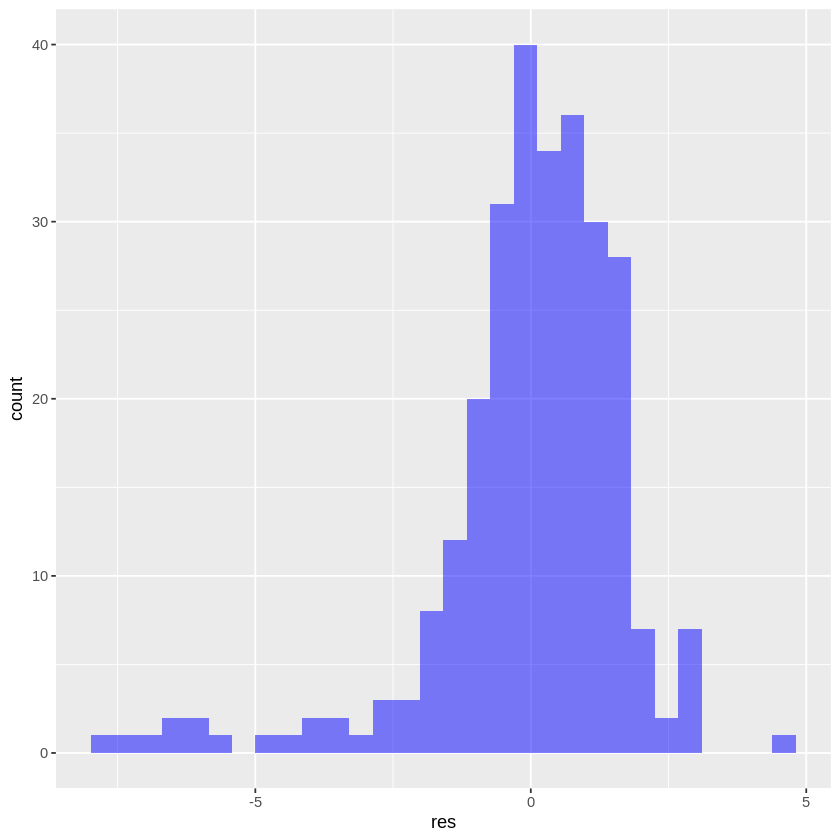

In [ ]:
# Grab residuals
res <- residuals(model)

# Convert to DataFrame for gglpot
res <- as.data.frame(res)

ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)


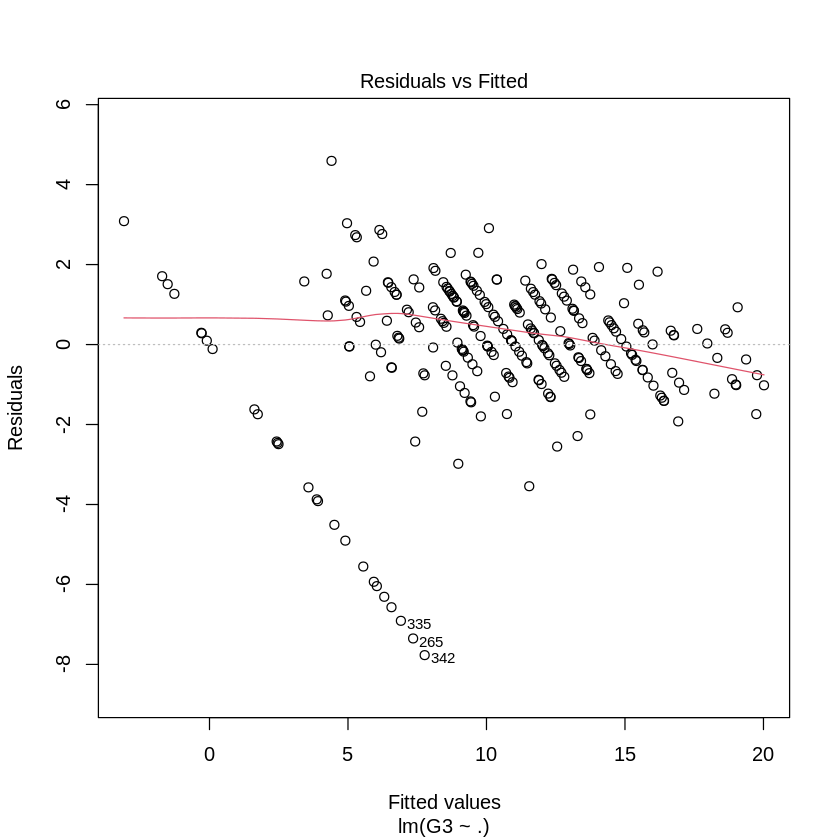

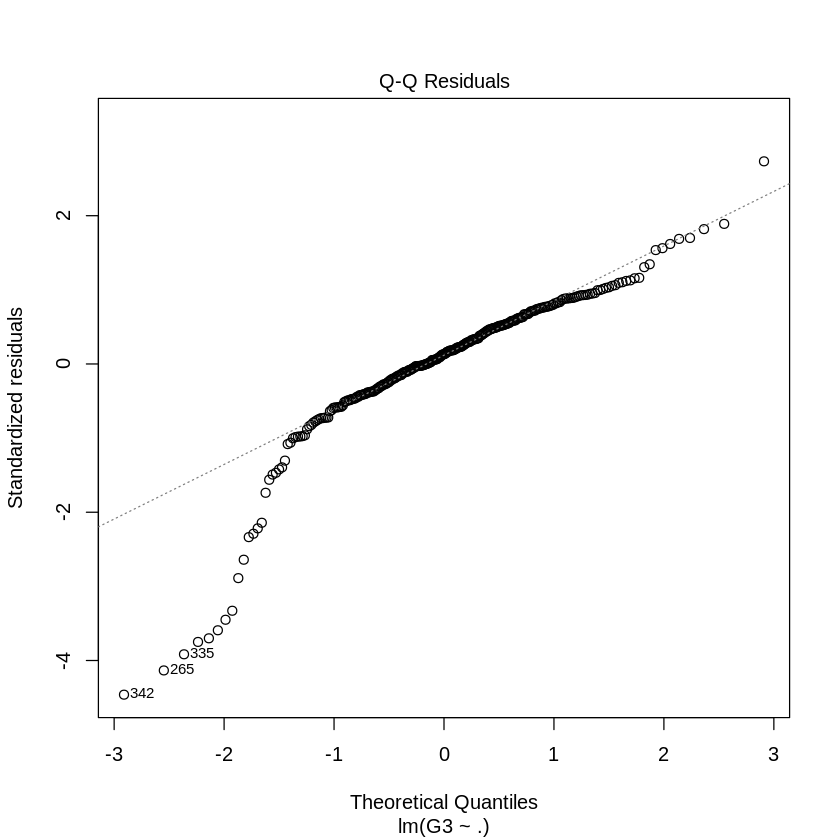

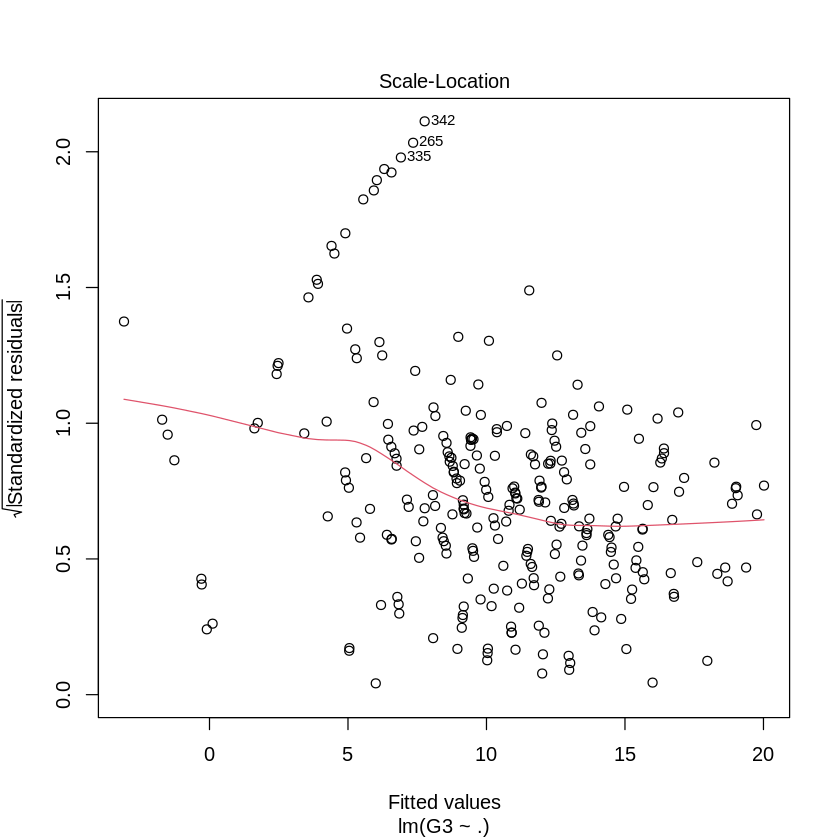

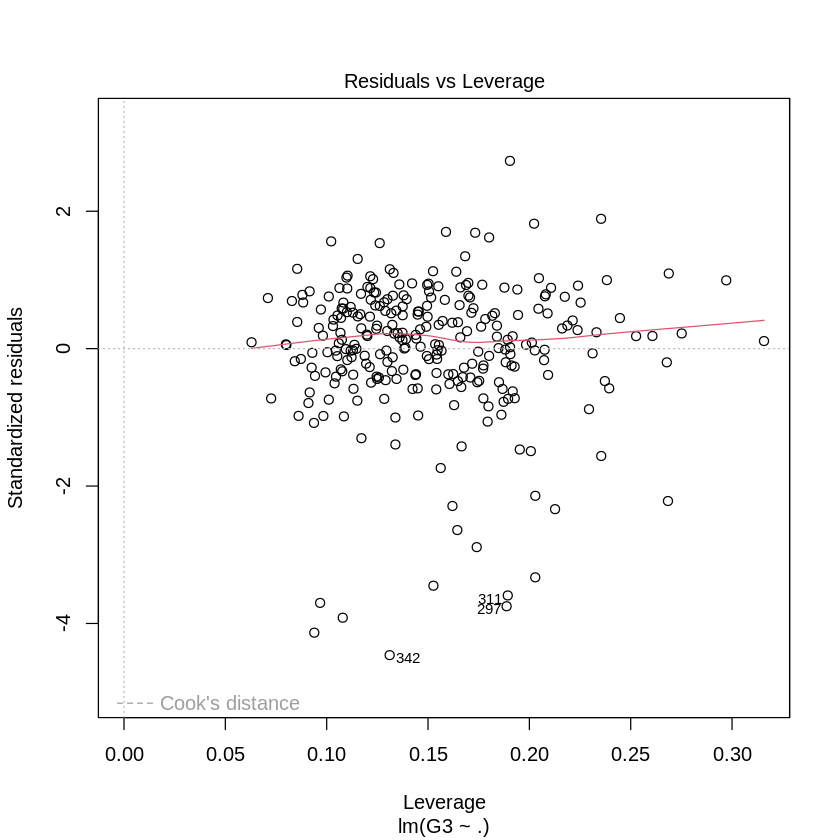

In [ ]:
plot(model)


## Predictions

Let's test our model by predicting on our testing set:

In [ ]:
G3.predictions <- predict(model,test)


Now we can get the root mean squared error, a standardized measure of how off we were with our predicted values:

In [ ]:
results <- cbind(G3.predictions,test$G3)
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

Now let's take care of negative predictions! Lot's of ways to this, here's a more complicated way, but its a good example of creating a custom function for a custom problem:

In [ ]:
to_zero <- function(x){
    if  (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [ ]:
results$pred <- sapply(results$pred,to_zero)


There's lots of ways to evaluate the prediction values, for example the MSE (mean squared error):



In [ ]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 4.411405


Or the root mean squared error:

In [ ]:
mse^0.5


[1] 2.100335

Or just the R-Squared Value for our model (just for the predictions)



In [ ]:
SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$G3) - results$real)^2)

R2 = 1 - SSE/SST
R2

[1] 0.7779023